<a href="https://colab.research.google.com/github/0mn1h4ck3d/machine-learning/blob/main/ai-detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Title: AI vs. Human Text Classifier

### **Overview**

This project develops a machine learning model capable of distinguishing between AI-generated and human-written text. With the rapid advancement in AI language models, distinguishing between text written by humans and AI has become increasingly challenging. This classifier aims to address this challenge by accurately predicting the origin of a given piece of text, thereby contributing to fields such as content verification, digital forensics, and the study of AI-generated disinformation.

### **Objectives**

- To implement a binary classification model that identifies whether a given text is AI-generated or human-written.

- To explore and compare different machine learning and deep learning techniques for natural language processing (NLP) tasks.

- To evaluate the model's performance using standard metrics such as accuracy, precision, recall, and F1 score.

### **Data**

The dataset consists of numerous text samples labeled as '0' for human-written and '1' for AI-generated. These samples encompass a wide range of topics and styles to ensure the model's robustness and generalizability. Data preprocessing steps, including tokenization, sequence padding, and vectorization, were meticulously applied to prepare the data for training.

### **Methodology**

- **Data Preprocessing**: Utilized TensorFlow's Tokenizer and pad_sequences to convert text data into a numerical format that can be fed into neural networks.

- **Model Architecture**: Developed a Sequential model using TensorFlow Keras, incorporating an Embedding layer followed by GlobalAveragePooling1D and Dense layers, optimized for binary classification tasks.

- **Training and Validation**: Employed a split of training and validation data to fine-tune the model, using binary cross-entropy as the loss function and accuracy as the performance metric.

- **Evaluation**: Assessed the model's performance on a held-out test set and utilized various metrics to ensure reliability and effectiveness in classifying text origins.

### **Results**

The model demonstrated promising results in distinguishing between AI-generated and human-written texts, with high accuracy and other performance metrics indicating its potential utility in real-world applications. Further tuning and experimentation with different model architectures, such as Convolutional Neural Networks (CNNs) and Recurrent Neural Networks (RNNs), are planned to enhance its predictive capabilities. The model, overall has nearly 100% accuracy and 0.00 loss.

# Visualizing & preprocessing data

In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Unzipping file
import zipfile
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/TensorFlow/AI_Human.csv.zip')
zip_ref.extractall()
zip_ref.close()

                                                text  generated
0  Cars. Cars have been around since they became ...        0.0
1  Transportation is a large necessity in most co...        0.0
2  "America's love affair with it's vehicles seem...        0.0
3  How often do you ride in a car? Do you drive a...        0.0
4  Cars are a wonderful thing. They are perhaps o...        0.0


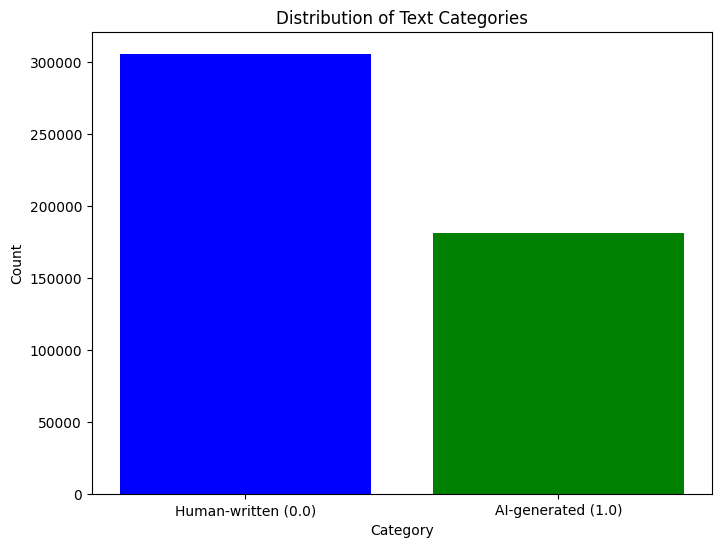

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset with specified data types
data = pd.read_csv('AI_Human.csv', dtype={'text': str, 'generated': float})

# Display the first few rows
print(data.head())

# Count the occurrences of each category
category_counts = data['generated'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(category_counts.index.astype(str), category_counts.values, color=['blue', 'green'])
plt.title('Distribution of Text Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks([0, 1], ['Human-written (0.0)', 'AI-generated (1.0)'])
plt.show()

In [28]:
import random

# Removing tags
def remove_tags(text):
    tags = ['\n', '\'']
    for tag in tags:
        text = text.replace(tag, '')

    return text


data['text'] = data['text'].apply(remove_tags)
data['text'][random.randint(0,100)]

'The Electoral College is a controversial topic in the US. This is the system used to elect the president of the United States, but most people 60% of Americans, according to source 1 believe that we shouldnt use this particular system and that we should go with the popular vote instead, while all others are strong in their stance that we should continue its use. Under the Electoral College, it is entirely possible for a Presidential Candidate to win presidency, even with the majority of voters voting for the opposing candidate. We should discard the Electoral College in favor of the popular vote.The Electoral College is a system that allows a certain amount of electoral votes to each state. Each state is given 2 electoral votes plus another amount of votes which depends on that states population. The amount of votes ranges from 3 to 55 source 3. A candidate must receive 270 out of 538 possible votes. The candidate the electoral votes of a state go to is decided by the majority vote of

In [29]:
# Removing punctuation
import string

string.punctuation

def remove_punct(text):
    new_text = [x for x in text if x not in string.punctuation]
    new_text = ''.join(new_text)
    return new_text

data['text']=data['text'].apply(remove_punct)
data['text'][random.randint(0,100)]

'Dear senator Retain the Electoral College The Electoral College consists of 538 electors and a majority of 270 electors is is required to elect the President Each state has hisher own electors which are chosen by the candidate political party You should keep the Electoral College because you have certainty of outcome and the President is everyones not just yoursThe first reason why you should stay with the Electoral College is because you are certain that the outcome will be in favor of one of the candidates A tie in the nationwide electoral vote may happen but it is very unlikely that it will even though that 538number of electors in the Electoral College is a even numberS3For example in 2012s election Obama received 617 percent of the electoral votes compared to 513 percent of the popular cast for him and rodney because all states award electoral votes on a winnertakeall basis even a slight plurality in a state creates a landslide electoralvote victory in that stateS3 Howeverbecause

In [30]:
from sklearn.model_selection import train_test_split

# Splitting data
y=data['generated']
X=data['text']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

print(len(X_train))
print(len(y_train))

341064
341064


# Building, compiling and training model


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer()),  # Step 1: CountVectorizer
    ('tfidf_transformer', TfidfTransformer()),  # Step 2: TF-IDF Transformer
    ('naive_bayes', MultinomialNB())])

pipeline.fit(X_train, y_train)

y_pred= pipeline.predict(X_test)

# Plotting results

In [32]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     91597
         1.0       0.99      0.87      0.93     54574

    accuracy                           0.95    146171
   macro avg       0.96      0.93      0.94    146171
weighted avg       0.95      0.95      0.95    146171



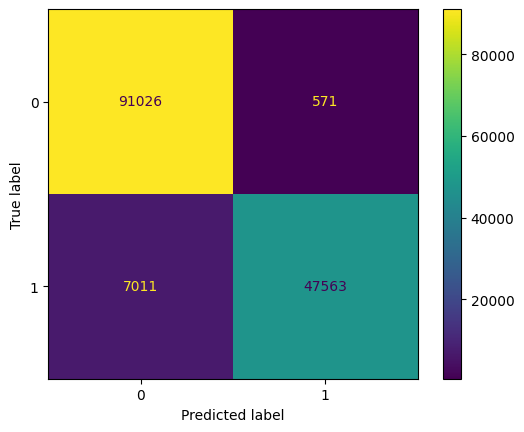

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Predicting on real, custom data

In [34]:
# Example custom texts
custom_texts = ["I love dogs.",
                "Certainly! Incorporating icebreaker activities that cater to both in-person and remote team members is essential for fostering a sense of inclusiveness and camaraderie."]

# Make predictions
custom_preds = pipeline.predict(custom_texts)

# Output predictions
for text, pred in zip(custom_texts, custom_preds):
    print(f"Text: {text}\nPredicted: {'AI-generated (1.0)' if pred == 1 else 'Human-written (0.0)'}\n")

# Get prediction probabilities
custom_probs = pipeline.predict_proba(custom_texts)

# Output prediction probabilities
for text, probs in zip(custom_texts, custom_probs):
    print(f"Text: {text}\nProbabilities: {probs}\n")

Text: I love dogs.
Predicted: Human-written (0.0)

Text: Certainly! Incorporating icebreaker activities that cater to both in-person and remote team members is essential for fostering a sense of inclusiveness and camaraderie.
Predicted: AI-generated (1.0)

Text: I love dogs.
Probabilities: [0.71093076 0.28906924]

Text: Certainly! Incorporating icebreaker activities that cater to both in-person and remote team members is essential for fostering a sense of inclusiveness and camaraderie.
Probabilities: [0.00567072 0.99432928]



# Saving model

In [13]:
from joblib import dump

# Save the pipeline model
dump(pipeline, 'ai-human-detection.joblib')

['ai-human-detection.joblib']